# Misure dirette di velocità del suono

## correlazione temporale

In [1]:
import numpy as np

#from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [2]:
import sympy
sympy.init_printing()

In [3]:
from IPython.display import Image

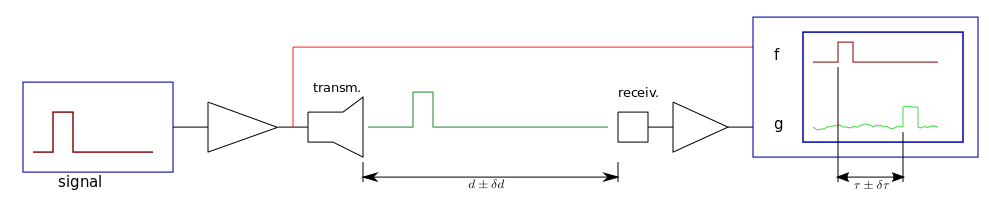

In [4]:
Image("./img/soundspeed.png")

## Correlazione di segnali:

$$F(\tau) = \int f(t) g(t+\tau) dt$$

## Convoluzione di segnali:

$$F(\tau) = \int f(t) g(t-\tau) dt$$

# Esempio

In [5]:
x, t, τ = sympy.symbols('x t \\tau')

In [6]:
f = sympy.Heaviside(x+sympy.Rational(1,2))-sympy.Heaviside(x-sympy.Rational(1,2))
g = sympy.Heaviside(x-sympy.Rational(3,2))-sympy.Heaviside(x-sympy.Rational(5,2))
#f = sympy.Piecewise((0,t<-sympy.Rational(1,2)),(1,t<sympy.Rational(1,2)),(0,True))
#g = sympy.Piecewise((0,t<sympy.Rational(3,2)),(1,t<sympy.Rational(5,2)),(0,True))

In [7]:
tplot = np.linspace(-5,5,500)
fplot = np.zeros_like(tplot)
gplot = np.zeros_like(tplot)

for i,ti in enumerate(tplot):
    fplot[i] = f.evalf(subs={x:ti})
    gplot[i] = g.evalf(subs={x:ti, τ:0})

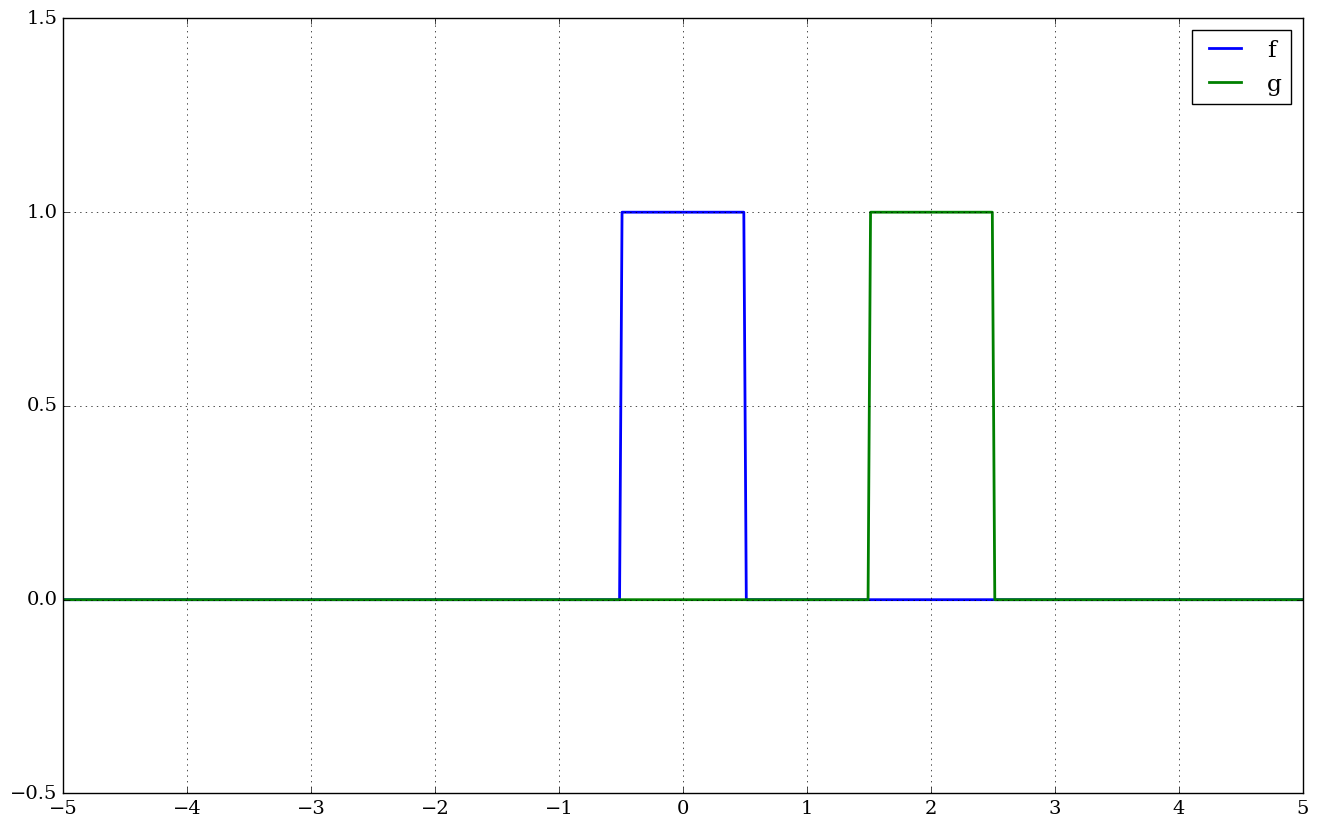

In [8]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(tplot,fplot,lw=2,label='f')
plt.plot(tplot,gplot,lw=2,label='g')
plt.xlim([-5,5])
plt.xticks(range(-5,6))
plt.ylim([-0.5,1.5])
plt.legend()
plt.grid()

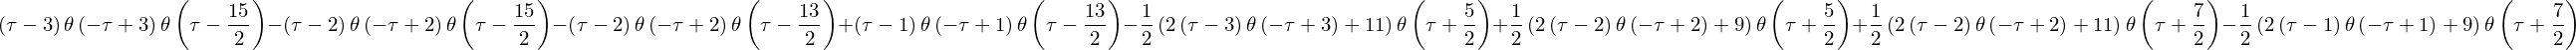

In [9]:
Fcor = sympy.integrate(f.subs(x,t,simultaneous=True)*g.subs(x,t+τ,simultaneous=True),(t,-5,5))
sympy.simplify(Fcor)

In [10]:
Fcplot = np.zeros_like(tplot)


for i,ti in enumerate(tplot):
    Fcplot[i] = Fcor.evalf(subs={τ:ti})

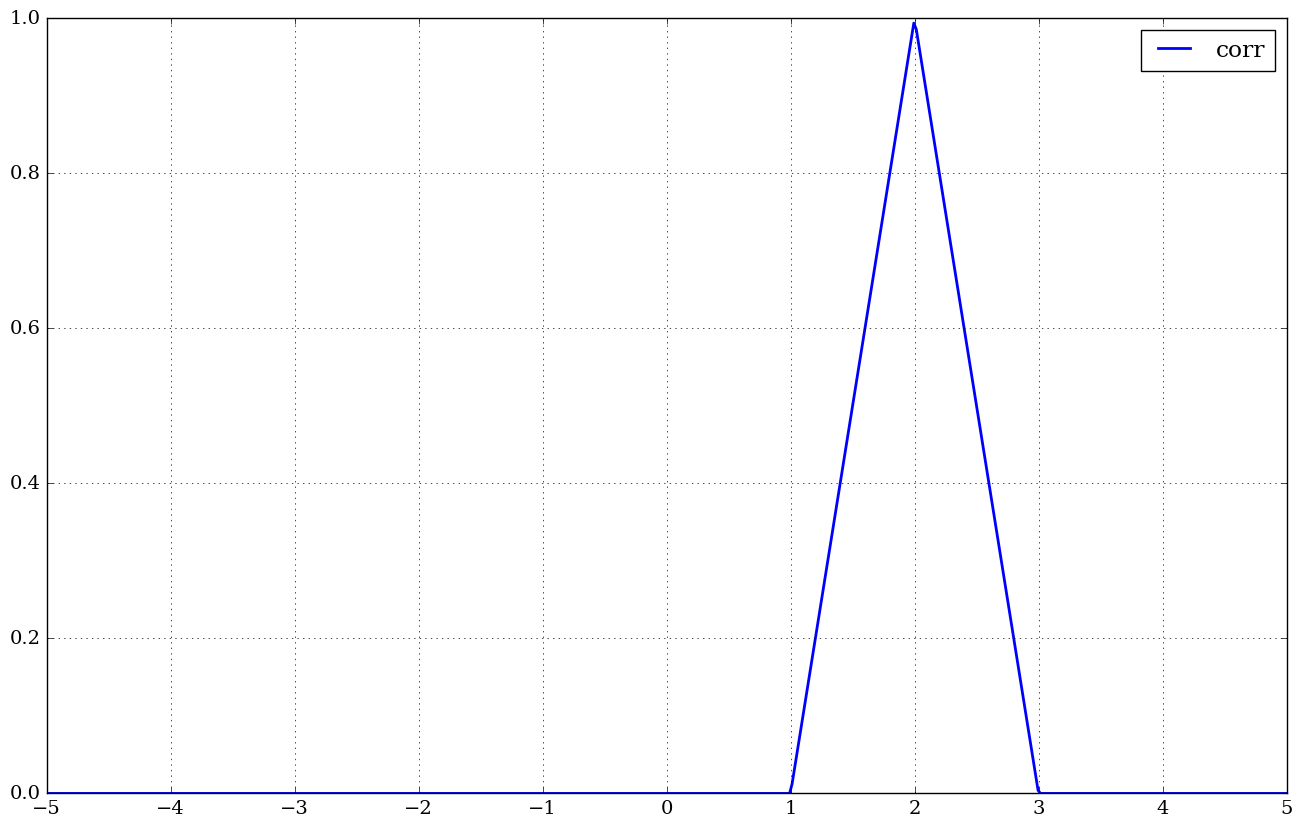

In [11]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(tplot,Fcplot,lw=2,label='corr')
plt.xlim([-5,5])
plt.xticks(range(-5,6))
#plt.ylim([-0.5,1.5])
plt.legend()
plt.grid()

# Serie Temporali

## esperimento reale

- valori in V
- intervallo di campionamento dt [s]

In [12]:
dt = 0.001

In [13]:
# %load ./data/corr_soundspeed.py
fs = np.array([0.000110333, 0.000776979, 0.00128481, 0.00130575, 0.000727422, 
   1.50105, 1.50098, 1.50009, 1.50025, 1.50015, 1.50045, 1.50078, 
   1.50125, 1.50124, 1.50119, 1.50098, 0.000923921, 0.000307584, 
   0.000811207, 0.000896327, 0.000990598, 0.000834859, 0.0000958224, 
   0.00137414, 0.00135927, 0.000431438, 0.00139138, 0.00125642, 
   0.00131365, 0.00109615, 0.0000490711, 0.0009138, 0.00146518, 
   0.0000144833, 0.000666183, 0.0013216, 0.000541852, 0.00017133, 
   0.000344588, 0.000519597, 0.000625035, 0.000319967, 0.00114405, 
   0.000556775, 0.000104952, 0.000945668, 0.00119341, 0.000694422, 
   0.00146712, 0.00119253, 0.00122667, 0.0008473, 0.000429121, 
   0.000229084, 0.00149896, 0.000329921, 0.00117101, 0.000242433, 
   0.00119804, 0.00130791, 0.000764556, 0.000536386, 0.0011683, 
   0.00115012, 0.00140066, 0.000481788, 0.000804942, 0.00123614, 
   0.0000217841, 0.00100766, 0.001244, 0.000165923, 0.00085215, 
   0.0000158154, 0.000485434, 0.000458285, 0.00105291, 0.000905121, 
   0.000453566, 0.000431327, 0.00120609, 0.000296939, 0.00112031, 
   0.000358196, 0.00129426, 0.00145835, 0.000483581, 0.000289832, 
   0.000508235, 0.000288746, 0.0000169891, 0.000427748, 0.00127448, 
   0.00099596, 0.000838159, 0.000498586, 0.00016935, 0.00146805, 
   0.00100532, 0.000983674, 0.000140273])
   
gs = np.array([0.0148361, 0.0263269, -0.0917966, 0.00905074, -0.00849458, 
  0.00214919, 0.0147521, 0.00204639, 0.0769036, 0.0461588, 0.0508448, 
  0.0884835, 0.00935899, -0.0131146, 0.0120642, 0.0134301, 
  0.0208647, -0.0291342, 0.0571828, 0.00916575, 0.00334857, 0.0146598,
   0.0410028, 0.0163643, 0.0133063, -0.0298097, 0.0473264, -0.0432278,
   0.0489971, 0.0195357, 0.0169747, 0.0195667, 0.043917, 0.0406381, 
  0.00679798, 0.0274787, 0.0552555, 0.0108202, 0.0176097, 
  0.0205502, -0.0526581, 0.00541791, 0.0291734, 0.0145768, 0.0219047, 
  0.0331469, 0.0323987, 0.0918577, 0.0235789, 0.0232341, 
  0.0187746, -0.0524088, 0.0255856, 0.00597409, 0.0463687, -0.0248377,
   0.0375669, 0.0457804, 0.0407626, 0.00287391, 0.090415, -0.0552647, 
  0.0414115, 0.0563515, 0.0897742, 0.0542499, 0.0544878, -0.00528114, 
  0.0159715, -0.0246072, 0.00528465, 0.0160663, 0.0219047, 0.0194492, 
  0.0351674, 0.0336438, 0.0205502, 1.490529, 1.46411, 1.45933, 
  1.45739, 1.45314, 1.47772, 1.47616, 1.48297, 1.45761, 1.47143, 
  1.46295, 1.505024, 1.47572, 0.000694134, -0.0520841, 0.000017469, 
  0.0503766, -0.0132665, 0.00555339, 0.00367966, -0.039397, 0.0132988,
   0.0573012, 0.00901239])


In [14]:
nt = np.linspace(0.,len(fs)*dt, len(fs), endpoint=False)

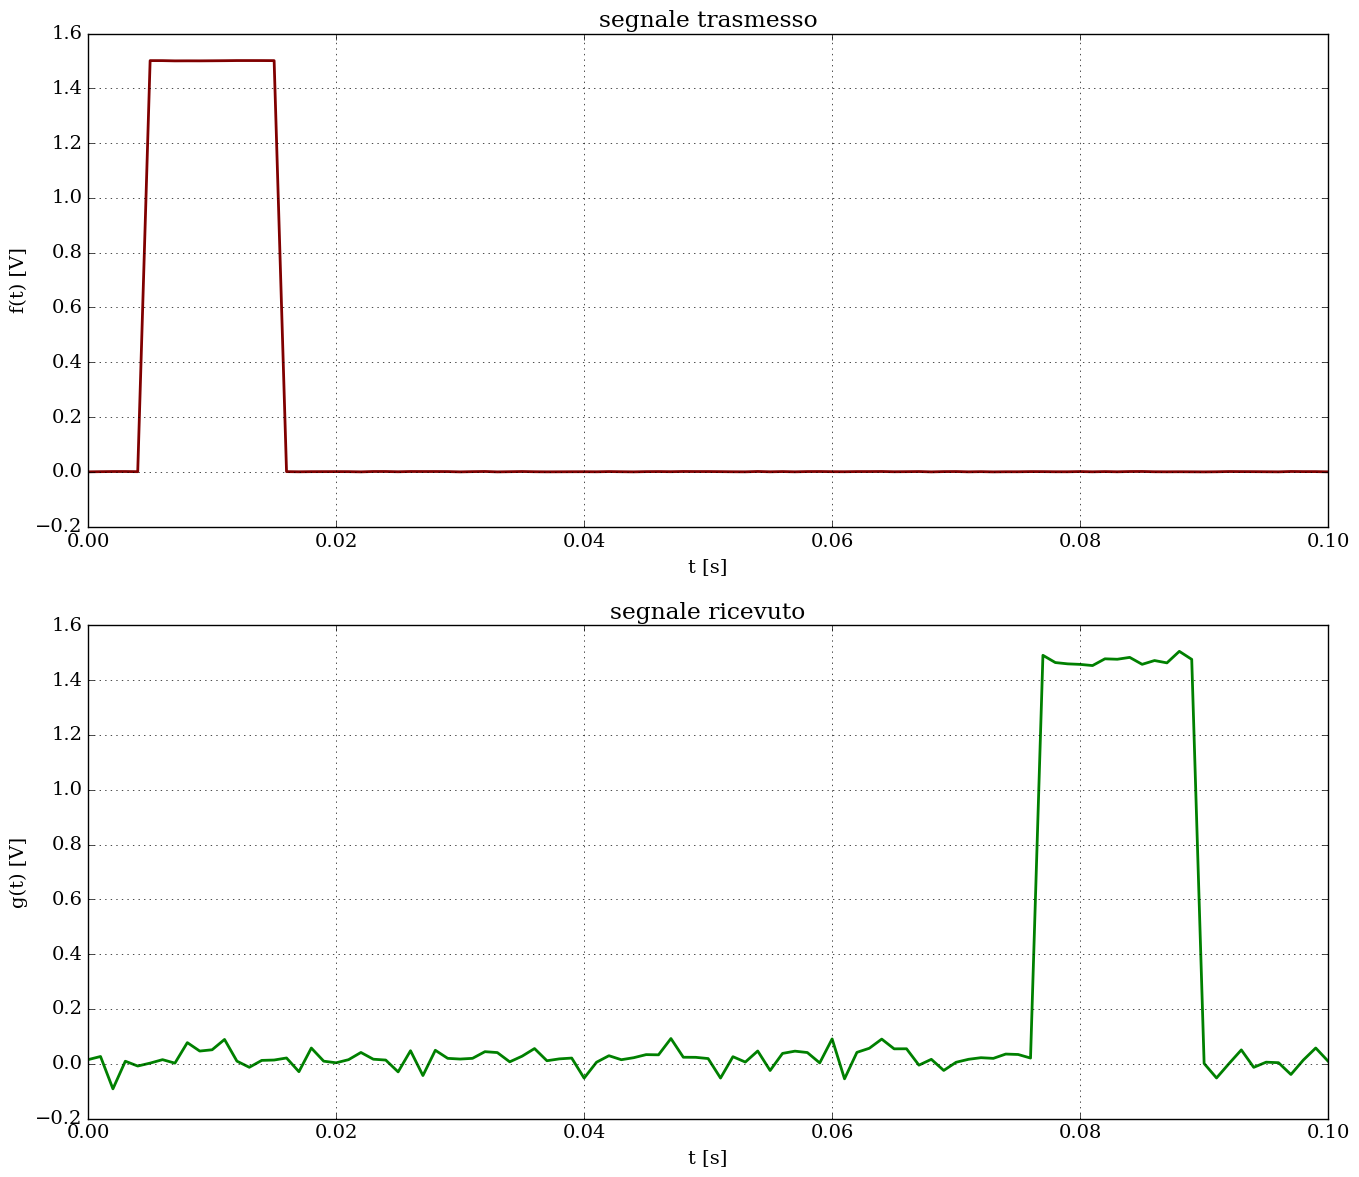

In [15]:
plt.figure(figsize=(16,14), dpi=300)
plt.subplot(211)
plt.xlabel('t [s]')
plt.ylabel('f(t) [V]')
plt.title('segnale trasmesso')
plt.plot(nt,fs,lw=2., color=(0.5,0.,0.))
plt.xlim([0.,0.1])
plt.ylim([-0.2, 1.6])
plt.grid()
plt.subplot(212)
plt.xlabel('t [s]')
plt.ylabel('g(t) [V]')
plt.title('segnale ricevuto')
plt.plot(nt,gs,lw=2., color=(0.,0.5,0.))
plt.xlim([0.,0.1])
plt.ylim([-0.2, 1.6])
plt.grid()

# Analisi segnale $g(t)$

livello di tolleranza del segnale

In [16]:
tol = 0.5*np.max(gs)

selezione impulso

In [17]:
gpeak = gs[np.where(gs > tol)]
gnoise = np.setdiff1d(gs, gpeak, assume_unique=True)

Definisco una funzione **root mean square** di un segnale

$$x_{rms} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_i^2 }$$

In [18]:
def rms(x):
    return np.sqrt(x.dot(x)/x.size)

calcolo:
- **valor medio**
- **rms**

delle componenti *peak* e *noise* del segnale

In [19]:
np.mean(gpeak)

In [20]:
rms(gpeak)

In [21]:
np.mean(gnoise)

In [22]:
rms(gnoise)

## SNR

$$ SNR = 20 log_{10}\left( \frac{p_{rms}}{n_{rms}} \right) $$

In [23]:
snr = 20*np.log10(rms(gpeak)/rms(gnoise))

In [24]:
snr

# Correlazione discreta

$$ F_{cor}[j] = \sum_{i=0}^{n-1} f[i] \cdot g[i+j] \cdot \Delta t $$

padded signals

In [25]:
fsp = np.lib.pad(fs, (0,2*len(fs)),'constant',constant_values=(0,0))
gsp = np.lib.pad(gs, (0,2*len(gs)),'constant',constant_values=(0,0))

In [26]:
n = len(fs)
corr = np.array([np.sum(fsp[0:n]*gsp[i:i+n])*dt for i in range(n)])

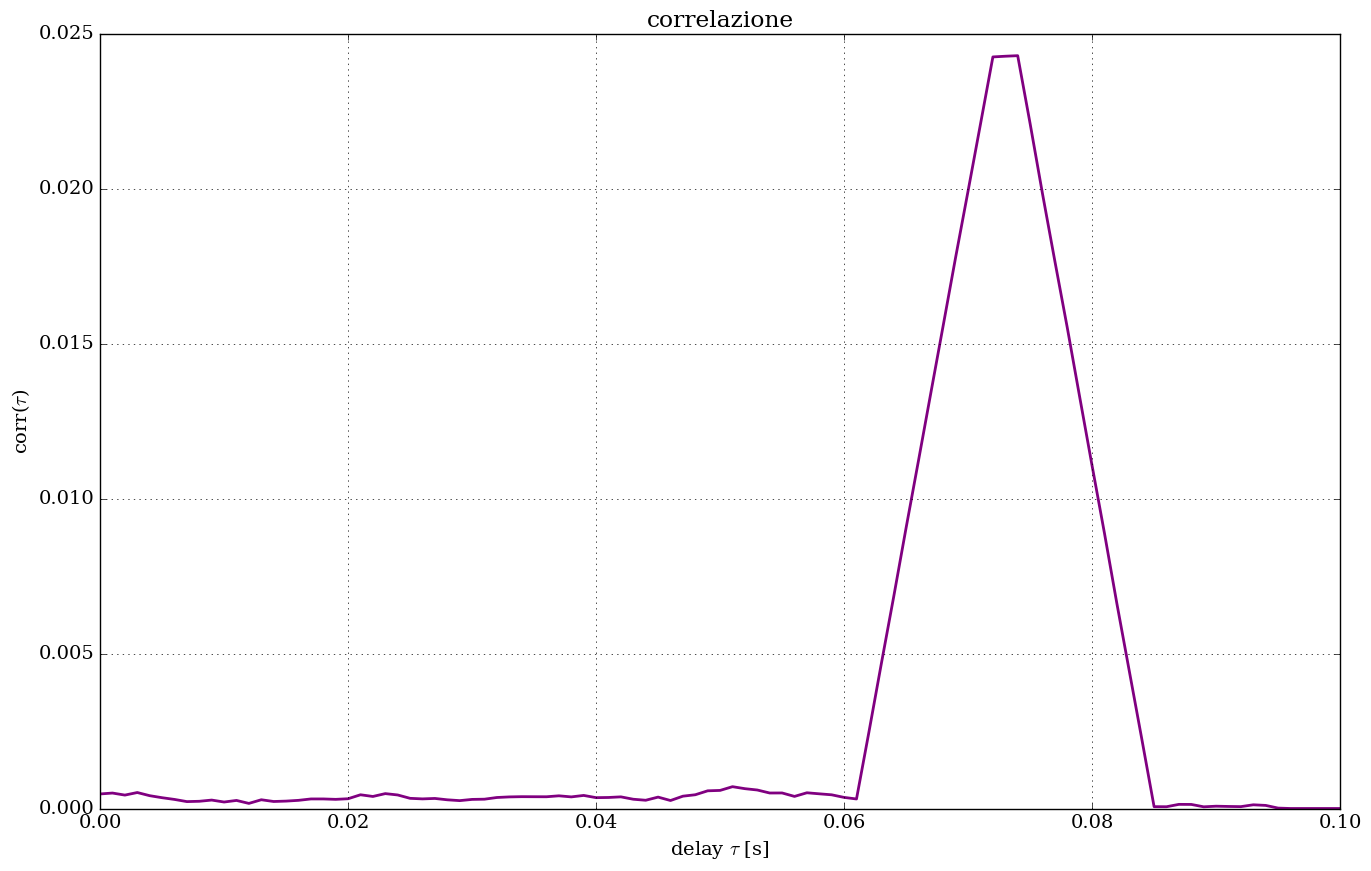

In [27]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(nt,corr,lw=2.,color=(0.5,0.,0.5))
plt.xlabel(r'delay $\tau$ [s]')
plt.ylabel(r'corr($\tau$)')
plt.title('correlazione')
plt.xlim([0.,0.1])
#plt.ylim([-0.1, 0.25])
plt.grid()

Comando **correlate** di *numpy*:
- opzione **full**: *zero padding* a destra e sinistra
- il primo array è quello che *shifta*
- nel plot si considera solo la parte finale

In [28]:
corr1 = np.correlate(gs,fs,'full')

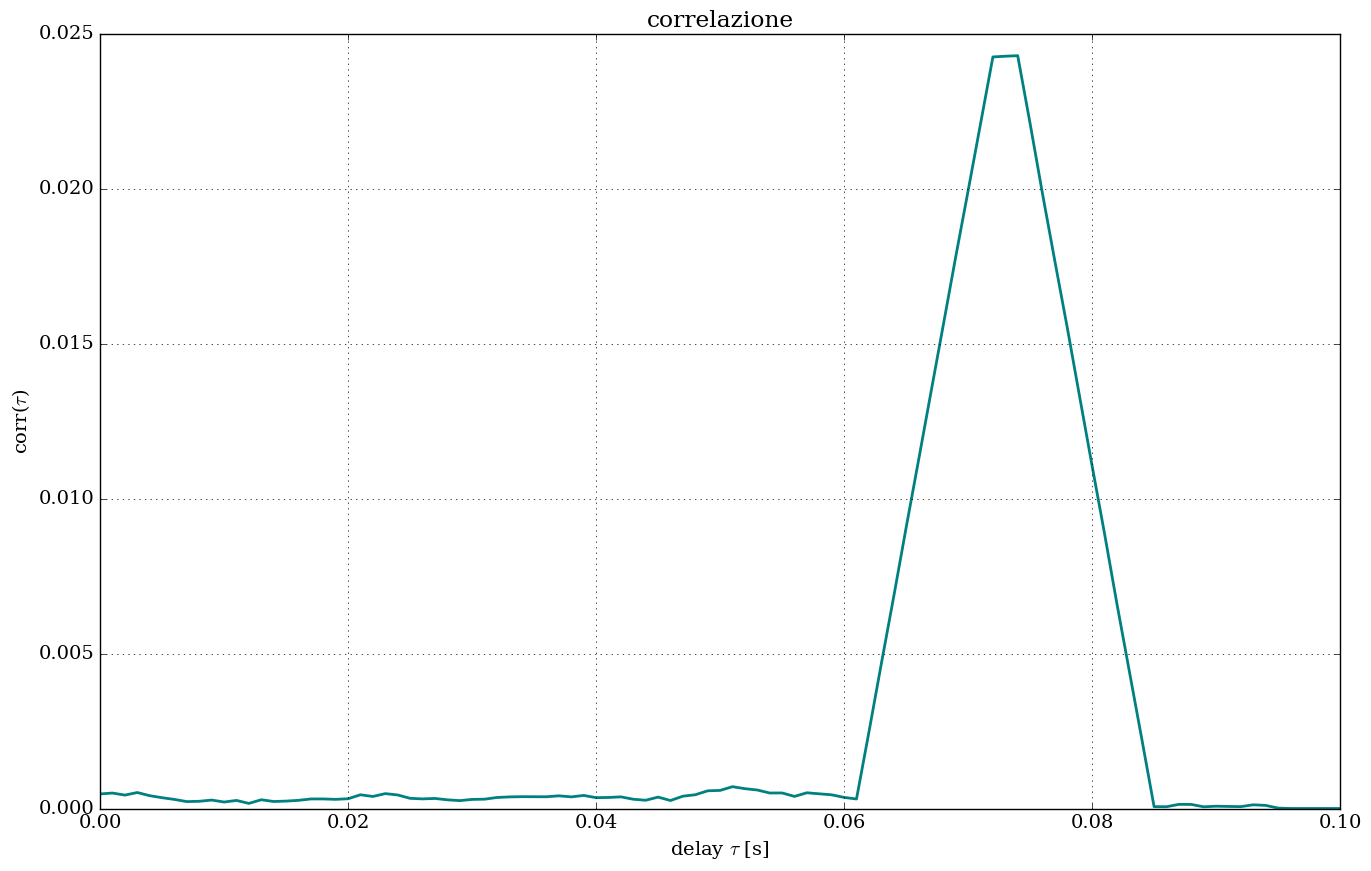

In [29]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(nt,dt*corr1[n-1:2*n],lw=2.,color=(0.,0.5,0.5))
plt.xlabel(r'delay $\tau$ [s]')
plt.ylabel(r'corr($\tau$)')
plt.title('correlazione')
plt.xlim([0.,0.1])
#plt.ylim([-0.1, 0.25])
plt.grid()

## Determinazione del massimo della correlazione

In [30]:
maxc = np.max(corr)
indc = np.argmax(corr)
print("max correlation: {0:.4f}".format(maxc))
print("max correlation delay value: {0}".format(nt[indc]))

max correlation: 0.0243
max correlation delay value: 0.074


**Rumore di di correlazione**

$$c_{rms} \sim \sigma f \cdot \sigma g \cdot N dt$$

In [31]:
crms = rms(gnoise)**2*n*dt

Regione dei massimi:
$$ corr \geq max_{corr} - c_{rms}$$

In [32]:
ind_m = np.where(corr>=maxc-crms)

In [33]:
t_corr = nt[ind_m]

In [34]:
μ_corr = (t_corr[0]+t_corr[-1])/2
μ_corr

In [35]:
σ_corr = (t_corr[-1]-t_corr[0])/2
σ_corr